In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Read in the image
image = mpimg.imread('img/test.jpg')

In [78]:
# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)
region_select = np.copy(image)


In [79]:
# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 195
green_threshold = 190
blue_threshold = 210
######

In [80]:
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# define the points of the triangle region of interest
# (0,0) is upper left
left_bottom = [25, 720]
apex = [657, 430]
right_bottom = [1100,720]


In [81]:
# use endpoints to find lines for the triangle using numpy polynomial fit
# fit[0] is slope, fit[1] is intercept
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


In [82]:
# Do a boolean or with the "|" character to identify
# pixels below the thresholds
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])

In [83]:
print(color_thresholds)


[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


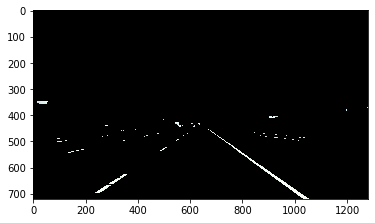

In [84]:
color_select[color_thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)

In [92]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
print(XX)
print(YY)
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

[[   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 ...
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [717 717 717 ... 717 717 717]
 [718 718 718 ... 718 718 718]
 [719 719 719 ... 719 719 719]]


[[731.47151899 731.01265823 730.55379747 ... 145.50632911 145.04746835
  144.58860759]
 [731.47151899 731.01265823 730.55379747 ... 145.50632911 145.04746835
  144.58860759]
 [731.47151899 731.01265823 730.55379747 ... 145.50632911 145.04746835
  144.58860759]
 ...
 [731.47151899 731.01265823 730.55379747 ... 145.50632911 145.04746835
  144.58860759]
 [731.47151899 731.01265823 730.55379747 ... 145.50632911 145.04746835
  144.58860759]
 [731.47151899 731.01265823 730.55379747 ... 145.50632911 145.04746835
  144.58860759]]


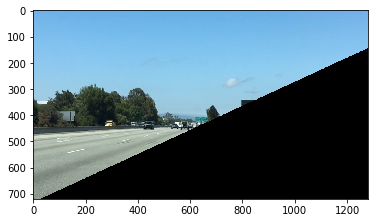

In [94]:
thres = (YY > (XX*fit_left[0] + fit_left[1]))
print(XX*fit_left[0] + fit_left[1])
test = np.copy(image)
test[thres] = [0,0,0]
plt.imshow(test)


(720, 1280, 3)


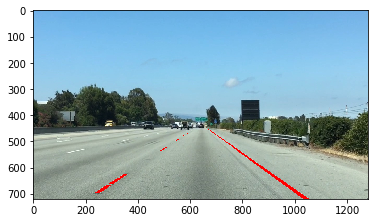

In [86]:
line_image[~color_thresholds & region_thresholds] = [255,0,0]
region_select[region_thresholds] = [0,0,0]

plt.imshow(line_image)
#plt.imshow(region_select)
print(line_image.shape)
